# Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from joblib import dump
from joblib import load
from keras.models import load_model

# Load Data

In [2]:
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


# Split Features from Target

In [3]:
X = df.values[:,0:10]
Y = df.values[:,10]

# Min Max Scaller

In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [5]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print("X_train.shape : ",X_train.shape)
print("Y_train.shape : ", Y_train.shape)
print("X_test.shape : ", X_test.shape)
print("Y_test.shape : ", Y_test.shape)
print("X_val.shape : ", X_val.shape)
print("Y_val.shape : ", Y_val.shape)

X_train.shape :  (1022, 10)
Y_train.shape :  (1022,)
X_test.shape :  (219, 10)
Y_test.shape :  (219,)
X_val.shape :  (219, 10)
Y_val.shape :  (219,)


# Build Model

In [6]:
model = Sequential([
Dense(32, activation='relu', input_shape=(10,)),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid'),
])

In [7]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.6872 - accuracy: 0.5558 - val_loss: 0.6807 - val_accuracy: 0.6073
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6360 - val_loss: 0.6716 - val_accuracy: 0.6530
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6585 - val_loss: 0.6638 - val_accuracy: 0.6758
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6849 - val_loss: 0.6564 - val_accuracy: 0.7352
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6908 - val_loss: 0.6499 - val_accuracy: 0.7580
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7387 - val_loss: 0.6434 - val_accuracy: 0.7580
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.7877 - val_loss: 0.6366 - val_accuracy: 0.7717
Epoch 8/100
3

In [9]:
test_loss,test_accuracy=model.evaluate(X_test, Y_test)
print("Test loss : ", test_loss)
print("Test Accuracy : ",test_accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9041
Test loss :  0.2746434211730957
Test Accuracy :  0.9041095972061157


# Loss

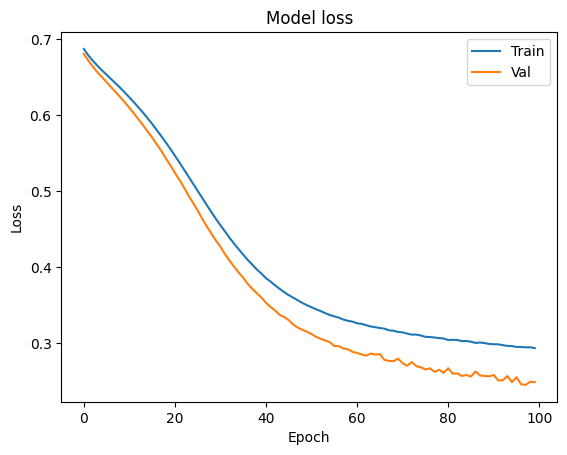

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Accuracy

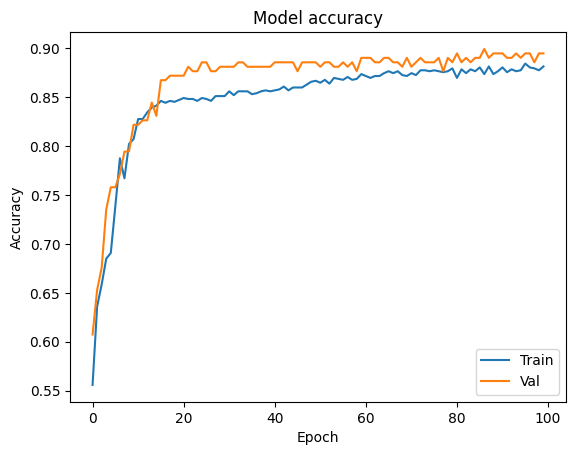

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Regularization

# Rebuild the Model

In [12]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
    ])

In [13]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 38ms/step - loss: 0.4971 - accuracy: 0.7427 - val_loss: 0.4011 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3397 - accuracy: 0.8503 - val_loss: 0.3042 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3032 - accuracy: 0.8757 - val_loss: 0.2594 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3417 - accuracy: 0.8513 - val_loss: 0.2847 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2915 - accuracy: 0.8787 - val_loss: 0.2418 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2840 - accuracy: 0.8796 - val_loss: 0.2811 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2499 - accuracy: 0.9002 - val_loss: 0.2215 - val_accuracy: 0.8995
Epoch 

# Loss

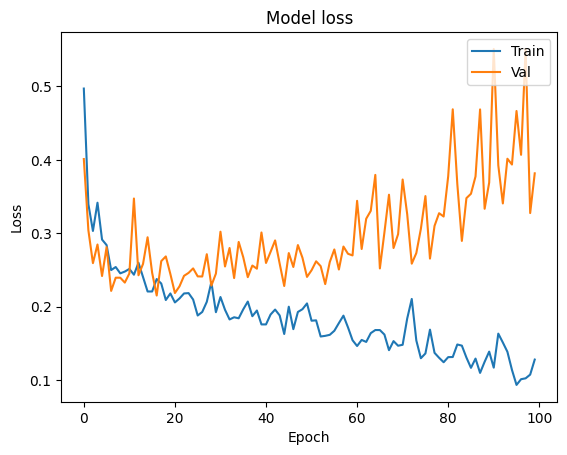

In [15]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Accuaracy

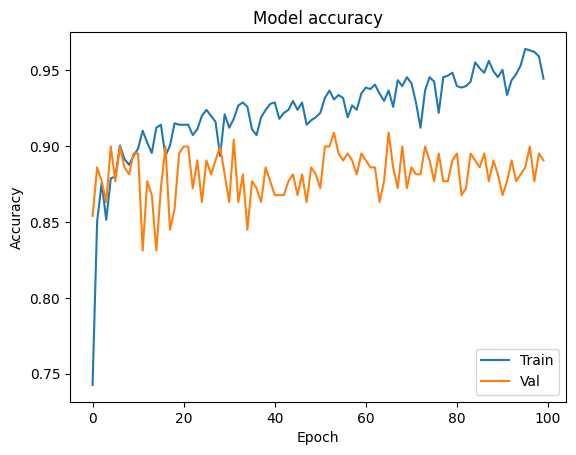

In [16]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Early Stopping

# Rebuild The Model

In [17]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01),
    input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    ])

In [18]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 54ms/step - loss: 14.2409 - accuracy: 0.6399 - val_loss: 3.8755 - val_accuracy: 0.8174
Epoch 2/100
32/32 [==============================] - 1s 42ms/step - loss: 1.6802 - accuracy: 0.8307 - val_loss: 0.6082 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 43ms/step - loss: 0.5717 - accuracy: 0.8434 - val_loss: 0.4636 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 1s 42ms/step - loss: 0.5203 - accuracy: 0.8601 - val_loss: 0.4952 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5206 - accuracy: 0.8523 - val_loss: 0.4972 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4912 - accuracy: 0.8708 - val_loss: 0.4161 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.5048 - accuracy: 0.8601 - val_loss: 0.4426 - val_accuracy: 0.8950
Epoch

# Loss

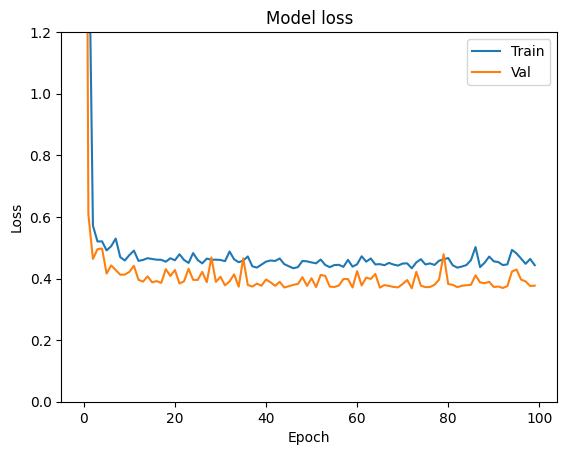

In [20]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

# Accuracy

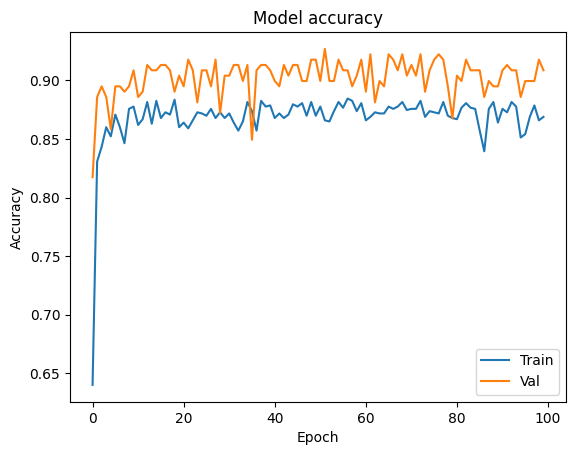

In [21]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Predict

In [22]:
y_pred=model.predict(X_test)
y_pred_classes=[]
for prob in y_pred:
 if prob>= 0.5:
     y_pred_classes.append(1)
 else:
     y_pred_classes.append(0)

7/7 [==============================] - 0s 2ms/step


# Scores

In [23]:
precision = precision_score(Y_test, y_pred_classes)

recall = recall_score(Y_test, y_pred_classes)

f1 = f1_score(Y_test, y_pred_classes)
print("Precision:", round(precision*100,0))
print("Recall:", round(recall*100,0))
print("F1 Score:", round(f1*100,0))

Precision: 89.0
Recall: 93.0
F1 Score: 91.0


# Confusion Matrix

In [24]:
confusion_mat = confusion_matrix(Y_test, y_pred_classes)

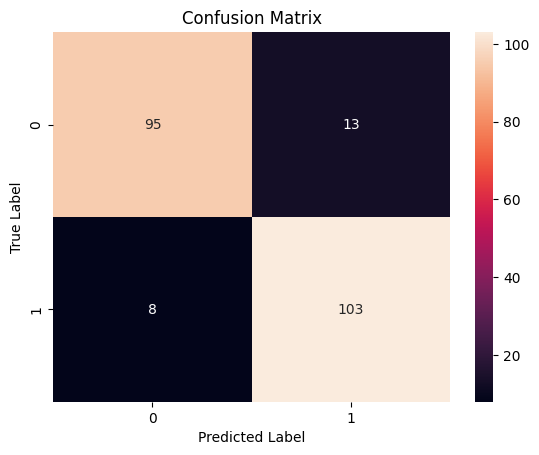

In [25]:
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save Model

In [26]:
model.save("houses_model.h5")

In [27]:
dump(min_max_scaler, "houses_min_max_scaler.pkl")

['houses_min_max_scaler.pkl']

# Test New Data

In [28]:
new_house = np.array( [[100,6,6,800, 2, 2, 3, 7, 1, 500]])

In [29]:
min_max_scaler_loaded = load("houses_min_max_scaler.pkl")

In [30]:
new_house = min_max_scaler.transform(new_house)

In [31]:
loaded_model = load_model("houses_model.h5")

In [32]:
new_prediction_proba = loaded_model.predict(new_house)

new_prediction = (new_prediction_proba > 0.5)

print(new_prediction)

1/1 [==============================] - 0s 114ms/step
[[ True]]
